<a href="https://colab.research.google.com/github/Ashkabsha/TimeSeries/blob/main/cnnlstm_PRO_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn import preprocessing
from keras.layers import Conv1D,Flatten,MaxPooling1D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool2D
from keras.layers import Dense,GlobalAveragePooling2D
import matplotlib.pyplot as plt
import os
import pprint
import tensorflow as tf
import yfinance as yf
from keras.initializers import RandomNormal


In [2]:

stock_symbol = 'TSLA'
stock = yf.download(stock_symbol,period="60mo",interval="1d")
print(stock.head())

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-11-29  23.133333  23.166668  22.636667  22.744667  22.744667   46210500
2018-11-30  22.788668  23.440001  22.550667  23.365334  23.365334   84436500
2018-12-03  24.000000  24.400000  23.466667  23.899332  23.899332  124597500
2018-12-04  23.736668  24.578667  23.466667  23.980000  23.980000  126928500
2018-12-06  23.733999  24.492001  23.384001  24.204000  24.204000  117637500


In [3]:
b_size=32
epoch=200
train_per=0.8
w_size=20
f_size=10

In [4]:

X = []
Y = []

for i in range(0 , len(stock) - w_size -1 , 1):
    first = stock.iloc[i, 1]
    temp = []
    temp2 = []
    for j in range(w_size):
        temp.append((stock.iloc[i + j, 1] - first) / first)
    temp2.append((stock.iloc[i +w_size, 1] - first) / first)
    X.append(np.array(temp).reshape(w_size, 1))
    Y.append(np.array(temp2).reshape(1,1))
train_X,test_X,train_label,test_label = train_test_split(X, Y, test_size=1-train_per,shuffle=False)
len_t = len(train_X)


In [5]:
print(train_X)

[array([[ 0.        ],
       [ 0.01179853],
       [ 0.05323734],
       [ 0.06094958],
       [ 0.0572086 ],
       [ 0.0920575 ],
       [ 0.05317979],
       [ 0.07099272],
       [ 0.07024457],
       [ 0.0861582 ],
       [ 0.08739564],
       [ 0.05237401],
       [ 0.01165461],
       [-0.00141009],
       [-0.04952525],
       [-0.06915113],
       [-0.09496406],
       [-0.05907917],
       [-0.07289211],
       [-0.03240291]]), array([[ 0.        ],
       [ 0.04095559],
       [ 0.04857791],
       [ 0.04488055],
       [ 0.07932308],
       [ 0.04089871],
       [ 0.05850393],
       [ 0.05776451],
       [ 0.07349257],
       [ 0.07471558],
       [ 0.04010233],
       [-0.00014224],
       [-0.0130546 ],
       [-0.06060869],
       [-0.08000571],
       [-0.10551763],
       [-0.0700512 ],
       [-0.08370307],
       [-0.04368601],
       [-0.03523892]]), array([[ 0.00000000e+00],
       [ 7.32242095e-03],
       [ 3.77053126e-03],
       [ 3.68579495e-02],
       [-5.

In [6]:
print(len(train_X))
print(len(test_X))
train_X = np.array(train_X)
test_X = np.array(test_X)
train_label = np.array(train_label)
test_label = np.array(test_label)
train_X = train_X.reshape(train_X.shape[0],1,w_size,1)
test_X = test_X.reshape(test_X.shape[0],1,w_size,1)
print((train_X).shape)
print((test_X).shape)

989
248
(989, 1, 20, 1)
(248, 1, 20, 1)


In [7]:
initializer = RandomNormal(mean = 0.0, stddev = 0.05,seed =5 )
model = Sequential()
model.add(TimeDistributed(Conv1D(128, kernel_size=1, activation='relu', input_shape=(None,w_size,1),kernel_initializer=initializer)))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(256, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(512, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
model.add(Bidirectional(LSTM(60,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(60)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse')
model.fit(train_X, train_label, validation_data=(test_X,test_label), epochs=epoch,batch_size=b_size,shuffle =False)
print(model.evaluate(test_X,test_label))

Epoch 1/200
31/31 [==============================] - 24s 233ms/step - loss: 0.0535 - val_loss: 0.0450
Epoch 2/200
31/31 [==============================] - 1s 20ms/step - loss: 0.0355 - val_loss: 0.0268
Epoch 3/200
31/31 [==============================] - 1s 26ms/step - loss: 0.0230 - val_loss: 0.0177
Epoch 4/200
31/31 [==============================] - 1s 24ms/step - loss: 0.0209 - val_loss: 0.0123
Epoch 5/200
31/31 [==============================] - 1s 23ms/step - loss: 0.0173 - val_loss: 0.0114
Epoch 6/200
31/31 [==============================] - 1s 22ms/step - loss: 0.0165 - val_loss: 0.0105
Epoch 7/200
31/31 [==============================] - 1s 24ms/step - loss: 0.0159 - val_loss: 0.0111
Epoch 8/200
31/31 [==============================] - 1s 28ms/step - loss: 0.0161 - val_loss: 0.0111
Epoch 9/200
31/31 [==============================] - 1s 26ms/step - loss: 0.0161 - val_loss: 0.0120
Epoch 10/200
31/31 [==============================] - 1s 28ms/step - loss: 0.0163 - val_loss: 0.01

In [8]:
predicted  = model.predict(test_X)
test_label = (test_label[:,0])
predicted = np.array(predicted[:,0]).reshape(-1,1)
for j in range(len_t , len_t + len(test_X)):
    temp =stock.iloc[j,1]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp

8/8 [==============================] - 2s 4ms/step


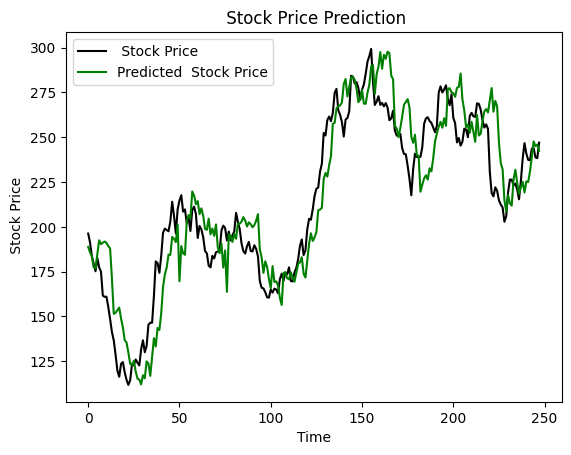

In [9]:
plt.plot(test_label, color = 'black', label = ' Stock Price')
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(test_label, predicted)
mse = mean_squared_error(test_label, predicted)
rmse = np.sqrt(mse)

# Print results
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

MAE: 15.371407262740597
MSE: 366.35906630713095
RMSE: 19.140508517464497
